In [1]:
using Distributions
using HypothesisTests
using Random
using StatsPlots
default(fmt=:png)

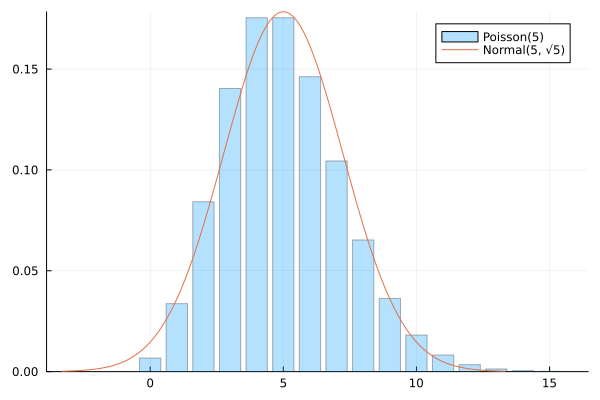

In [2]:
bar(Poisson(5); label="Poisson(5)", alpha=0.3)
plot!(Normal(5, √5); label="Normal(5, √5)")

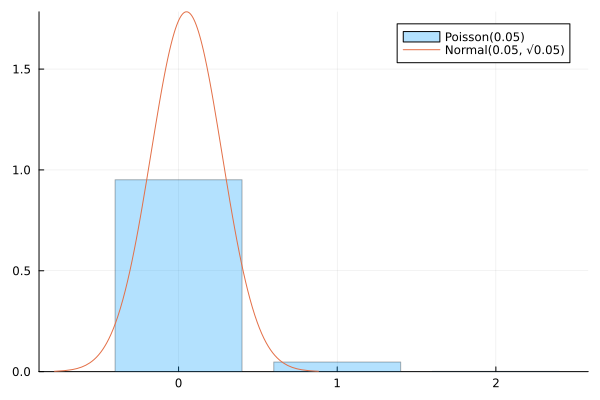

In [3]:
bar(Poisson(0.05); label="Poisson(0.05)", alpha=0.3)
plot!(Normal(0.05, √0.05); label="Normal(0.05, √0.05)")
plot!(xtick=-10:100)

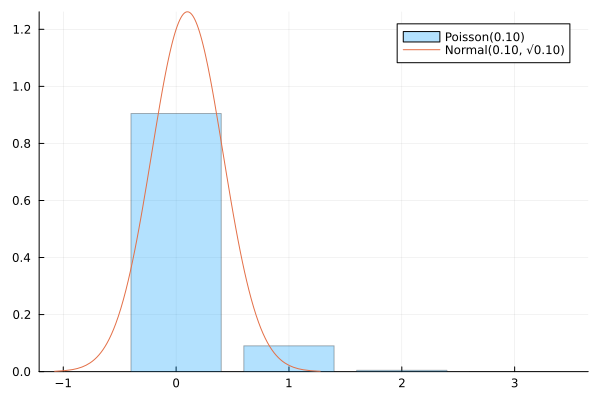

In [4]:
bar(Poisson(0.10); label="Poisson(0.10)", alpha=0.3)
plot!(Normal(0.10, √0.10); label="Normal(0.10, √0.10)")
plot!(xtick=-10:100)

In [5]:
myecdf(A, x) = count(≤(x), A)/length(A)

distname(dist) = replace(string(dist), r"{[^}]*}"=>"")

function distname(dist::LocationScale)
    μ, σ, ρ = params(dist)
    a = μ == 0 ? "" : "$μ + "
    b = σ == 1 ? "" : "$σ "
    a * b * distname(ρ)
end

function plot_ecdf_pvals(; distx=Poisson(0.05), disty=Poisson(0.05), m=100, n=900, L=10^5)
    pval_welch = zeros(L)
    pval_student = zeros(L)
    nth = Threads.nthreads()
    Xtmp = [zeros(m) for _ in 1:nth]
    Ytmp = [zeros(n) for _ in 1:nth]
    Threads.@threads for i in 1:L
        tid = Threads.threadid()
        X = rand!(distx, Xtmp[tid])
        Y = rand!(disty, Ytmp[tid])
        if mean(X) == mean(Y)
            pval_welch[i] = 1.0
            pval_student[i] = 1.0
        else
            pval_welch[i] = pvalue(UnequalVarianceTTest(X, Y))
            pval_student[i] = pvalue(EqualVarianceTTest(X, Y))
        end
    end
    
    println("distx = ", distname(distx))
    println("disty = ", distname(disty))
    @show m n
    @show mean(distx) - mean(disty)
    @show std(distx) / std(disty)

    plot(α->myecdf(pval_welch, α), 0, 0.1; label="Welch")
    plot!(α->myecdf(pval_student, α); label="Student")
    plot!(identity; label="", ls=:dot, c=:gray)
    plot!(xtick=0:0.01:1, ytick=0:0.01:1)
    plot!(xguid="α", yguide="probability of P-value ≤ α")
    plot!(size=(400, 400))
end

plot_ecdf_pvals (generic function with 1 method)

distx = Poisson(λ=0.05)
disty = Poisson(λ=0.05)
m = 100
n = 900
mean(distx) - mean(disty) = 0.0
std(distx) / std(disty) = 1.0


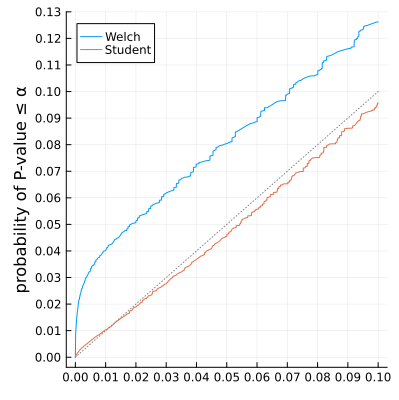

In [6]:
plot_ecdf_pvals(; distx=Poisson(0.05), disty=Poisson(0.05), m=100, n=900)

distx = Poisson(λ=0.1)
disty = 0.05 + Poisson(λ=0.05)
m = 100
n = 900
mean(distx) - mean(disty) = 0.0
std(distx) / std(disty) = 1.4142135623730951


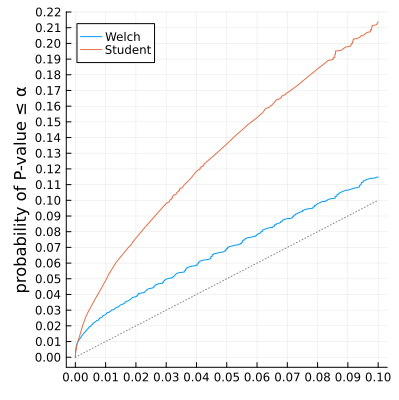

In [7]:
plot_ecdf_pvals(; distx=Poisson(0.10), disty=Poisson(0.05)+0.05, m=100, n=900)

distx = 0.05 + Poisson(λ=0.05)
disty = Poisson(λ=0.1)
m = 100
n = 900
mean(distx) - mean(disty) = 0.0
std(distx) / std(disty) = 0.7071067811865475


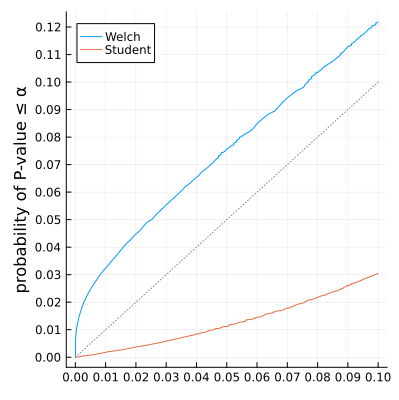

In [8]:
plot_ecdf_pvals(; distx=Poisson(0.05)+0.05, disty=Poisson(0.10), m=100, n=900)

distx = Poisson(λ=0.072)
disty = 0.022 + Poisson(λ=0.05)
m = 100
n = 900
mean(distx) - mean(disty) = -1.3877787807814457e-17
std(distx) / std(disty) = 1.2000000000000002


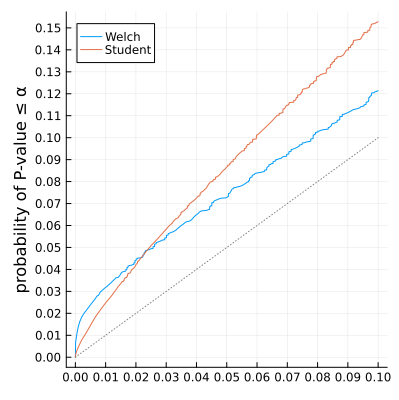

In [9]:
plot_ecdf_pvals(; distx=Poisson(1.2^2*0.05), disty=Poisson(0.05)+(1.2^2-1)*0.05, m=100, n=900)

distx = 0.022 + Poisson(λ=0.05)
disty = Poisson(λ=0.072)
m = 100
n = 900
mean(distx) - mean(disty) = 1.3877787807814457e-17
std(distx) / std(disty) = 0.8333333333333333


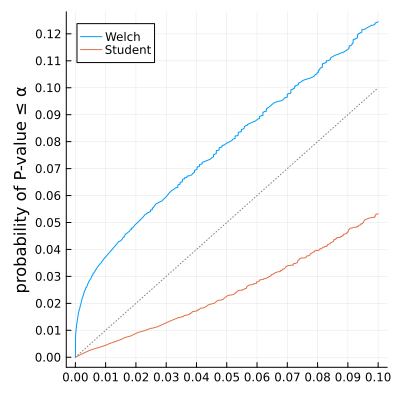

In [10]:
plot_ecdf_pvals(; distx=Poisson(0.05)+(1.2^2-1)*0.05, disty=Poisson(1.2^2*0.05), m=100, n=900)

distx = Poisson(λ=0.05)
disty = Poisson(λ=0.05)
m = 100
n = 100
mean(distx) - mean(disty) = 0.0
std(distx) / std(disty) = 1.0


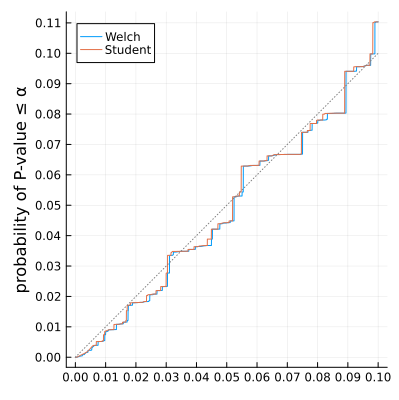

In [11]:
plot_ecdf_pvals(; distx=Poisson(0.05), disty=Poisson(0.05), m=100, n=100)

distx = Poisson(λ=0.05)
disty = Poisson(λ=0.05)
m = 100
n = 200
mean(distx) - mean(disty) = 0.0
std(distx) / std(disty) = 1.0


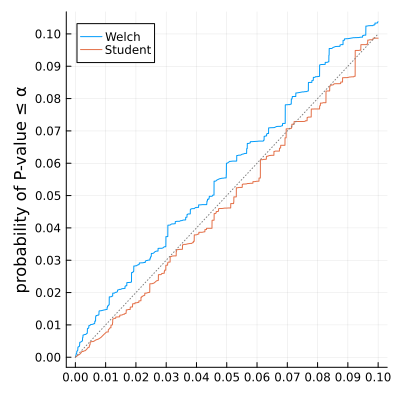

In [12]:
plot_ecdf_pvals(; distx=Poisson(0.05), disty=Poisson(0.05), m=100, n=200)

distx = Poisson(λ=0.05)
disty = Poisson(λ=0.05)
m = 200
n = 1800
mean(distx) - mean(disty) = 0.0
std(distx) / std(disty) = 1.0


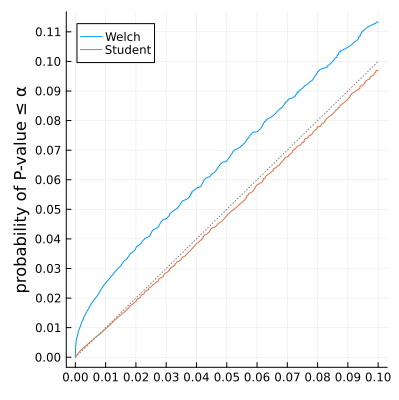

In [13]:
plot_ecdf_pvals(; distx=Poisson(0.05), disty=Poisson(0.05), m=200, n=1800)

distx = Poisson(λ=0.05)
disty = Poisson(λ=0.05)
m = 400
n = 3600
mean(distx) - mean(disty) = 0.0
std(distx) / std(disty) = 1.0


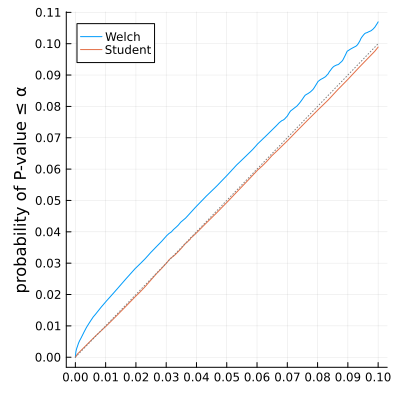

In [14]:
plot_ecdf_pvals(; distx=Poisson(0.05), disty=Poisson(0.05), m=400, n=3600)

distx = Poisson(λ=0.05)
disty = Poisson(λ=0.05)
m = 1000
n = 9000
mean(distx) - mean(disty) = 0.0
std(distx) / std(disty) = 1.0


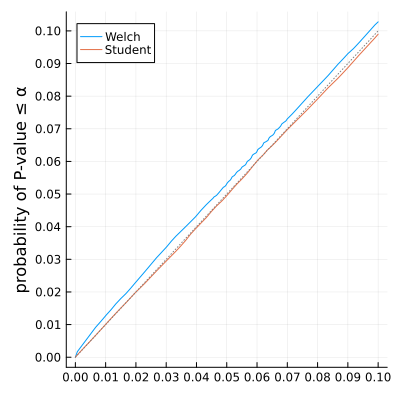

In [15]:
plot_ecdf_pvals(; distx=Poisson(0.05), disty=Poisson(0.05), m=1000, n=9000)

distx = Poisson(λ=0.1)
disty = 0.05 + Poisson(λ=0.05)
m = 1000
n = 9000
mean(distx) - mean(disty) = 0.0
std(distx) / std(disty) = 1.4142135623730951


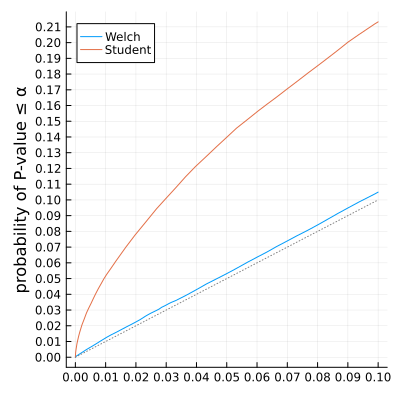

In [16]:
plot_ecdf_pvals(; distx=Poisson(0.10), disty=Poisson(0.05)+0.05, m=1000, n=9000)

distx = 0.05 + Poisson(λ=0.05)
disty = Poisson(λ=0.1)
m = 1000
n = 9000
mean(distx) - mean(disty) = 0.0
std(distx) / std(disty) = 0.7071067811865475


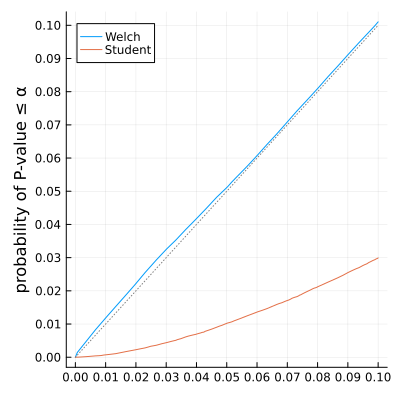

In [17]:
plot_ecdf_pvals(; distx=Poisson(0.05)+0.05, disty=Poisson(0.10), m=1000, n=9000)